### Use regression models to predict housing prices on the Boston housing dataset (inbuilt with Sklearn)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.discriminant_analysis import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#  read the dataset
rawDF = pd.read_csv('HousingData.csv')
rawDF.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# view check for missing values
rawDF.info()
rawDF.isna().sum()
#  fill all the missing values with the mean
rawDF.fillna(value=rawDF.mean(), inplace=True)
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       50

In [4]:
#  the column choosen as feature which holds the value of the homes
pd.DataFrame(rawDF['MEDV']).head(10)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [5]:
# get so statistical info on the whole dataset
rawDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


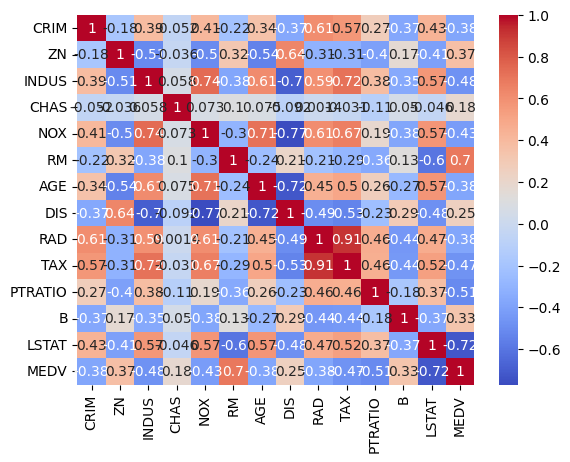

In [6]:
#  plot some heat map for relationship visualization
sns.heatmap(rawDF.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
# feature selection
X = rawDF.drop(columns=['MEDV'])
Y = rawDF['MEDV']


In [8]:
#  split the dataset 
X_Train,X_test, Y_Train,Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_Train)
# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [10]:
#  train the  model
model = LinearRegression()
model.fit(X_train_scaled,Y_Train)

LinearRegression()

In [11]:
print(model.coef_) 

[-0.95689125  0.76564769 -0.0275685   0.99758886 -1.73502958  3.0700712
 -0.77852723 -3.16148806  1.62771195 -1.11340588 -2.02547903  1.03592543
 -3.29752116]


In [12]:
#  running predictions with our model
y_pred = model.predict(X_test_scaled)
y_pred

array([ 2.89327828e+01,  3.72264420e+01,  1.53900739e+01,  2.57185341e+01,
        1.83596001e+01,  2.29554589e+01,  1.79744238e+01,  1.44658802e+01,
        2.20164734e+01,  2.07826529e+01,  2.52375783e+01,  1.86049092e+01,
       -5.97686216e+00,  2.19128236e+01,  1.89542357e+01,  2.52634479e+01,
        1.93898010e+01,  6.10283345e+00,  4.07365828e+01,  1.70418841e+01,
        2.50043963e+01,  3.04300577e+01,  1.12948841e+01,  2.26459624e+01,
        1.74059694e+01,  1.51957538e+01,  2.15647727e+01,  1.42789088e+01,
        2.32314685e+01,  1.95702105e+01,  2.22135154e+01,  2.51339260e+01,
        2.51848660e+01,  1.72517881e+01,  1.62269758e+01,  1.72020945e+01,
        3.06696868e+01,  2.02682921e+01,  2.48033988e+01,  2.29730392e+01,
        1.46046930e+01,  3.16248324e+01,  4.27196491e+01,  1.80945478e+01,
        2.72906158e+01,  1.65123231e+01,  1.38565860e+01,  2.66063921e+01,
        1.97032124e+01,  3.01632377e+01,  2.09122025e+01,  3.32819532e+01,
        1.58148322e+01,  

In [13]:

# Calculate performance metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 21.05
Mean Absolute Error: 3.13
R^2 Score: 0.72
